<span style="font-size:8pt">*ÉTS Montréal, GPA671 : Introduction à l’intelligence artificielle. Date : le 23/10/21. Auteur : Jérôme Rony. Version : 1.2*</span>

# Laboratoire 2 : Classificateurs statistiques et SVM

## Exercise 1 : SVM linéaire à marge souple 

Dans cet exercice, le but est d’implémenter un SVM linéaire à marge souple. Afin de pouvoir visualiser les frontières de décision, les données seront dans un espace à 2 dimensions pour cet exercise.

### Rappels de cours

Dans un SVM à marge souple, on cherche à maximiser la marge tout en minimisant les variables ressorts $\xi_i$, ce qui correspond au problème suivant :
\begin{equation}
\begin{aligned}
\underset{{\bf w}, b, \xi}{\text{minimize}}&& \frac{1}{2} {\bf w}^\top {\bf w} &+ C\sum\limits_{n=1}^{N}\xi_n\\
\text{subject to}&& \quad y_n({\bf w}^\top {\bf x}_n + b) & \geq 1 - \zeta_i  &n = 1, \dots, N\\
&& \xi_n & \geq 0 &n=1, \dots, N
\end{aligned}
\end{equation}

Avec C qui est un hyper-paramètre qui contrôle le compromis entre les deux objectifs de l’entrainement. Ce problème d’optimisation peut être reformulé en un problème équivalent :
\begin{equation}
\underset{{\bf w}, b}{\text{minimize}} \quad \frac{1}{2} {\bf w}^\top {\bf w} + C\sum\limits_{n=1}^{N}\max(0, 1 - y_n({\bf w}^\top {\bf x}_n + b))
\end{equation}


### Questions  (30 pts)

**Il est fortement conseiller de faire des fonctions pour chacune des étapes suivantes car il vous sera demandé refaire certaines étapes plusieurs fois dans les prochaines questions.**
1. Dans un premier temps, nous allons générer des données synthétiques que l’on peut presque séparer linéairement, c’est-à-dire avec du chevauchement, à l’aide du code suivant :
```python
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=1000, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42, shift=1)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
```
Afficher ces données à l’aide de la fonction `scatter` de Matplotlib avec une couleur différente pour chaque classe. Commentez sur la distribution des données. (5 pts)

2. effectuez l'entrainement pour c = 1 et T = 1000. Utilisez le modèle SVC(kernel='linear',random_state=42) de la bibliothèque logicielle sklearn. affichez la frontière de décision et le taux d'exactitude. En s’inspirant de [la documentation de scikit-learn](https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html#sphx-glr-auto-examples-svm-plot-linearsvc-support-vectors-py), afficher la frontière de décision, les marges et vecteurs de supports par-dessus les données d’entrainement. N'utilisez pas de fonctions pour directement tracer cette courbe(faites le manuellement). (5 pts)

3. À l’aide des exemples de validation pour obtenir le taux d’exactitude, trouver les meilleurs hyper-paramètres en essayant les valeurs C  {0.005, 0.01, 0.1, 1, 10, 50, 100} et T  \{1, 10, 20, 50, 100, 200, 500,1000,2000,5000\} ( le nombre d'itération) .Éffectuez une recherche en grille de ces paramètres. Afficher un graphique de type «heat map» résumant les performances obtenues pour chaque combinaison de c et T . Expliquez l'impact de chaque hyper-paramètre. (5 pts)

4. À l'aide des données de test, utilisez la combinaison de C et T donnant les meilleurs performances et faites une inférence. Expliquez vos observations.(5 pts)

5. Effectuez ensuite une validation croisée avec k=5 pour toutes les recherches en grilles précédentes(N'utilisez pas de bibliothèques). Affichez le taux d'exactitude moyen pour chaque combinaison de T et de C à l'aide d'un graphique de type «heatmap». Calculez le temps d'entrainement pour chaque combinaison. Pourquoi est-il intéressant de faire une validation croisée, en général? Que remarquez-vous au niveau du temps d'entrainement en fonction des hyper paramètres, en général? Commentez et expliquez ce comportement. (5 pts)

6. Affichez  la frontière de décision pour T =5000 et C =  {0.005, 0.01, 0.1, 1, 10, 50, 100,1000}. Que remarquez vous? Quelles conclusions pouvez vous tirer quant au temps d'entrainement en fonction de C et expliquez ce phénomène? (5 pts)


In [24]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import GridSearchCV
X, y = make_classification(n_samples=1000, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42, shift=1)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [25]:
def scatter_display(x, y, xlabel, ylabel, title):
    fig = plt.figure()
    scat = fig.add_subplot()
    scat.scatter(x[:, 0], x[:, 1], c=y, cmap="bwr", edgecolor="k", alpha=0.7)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


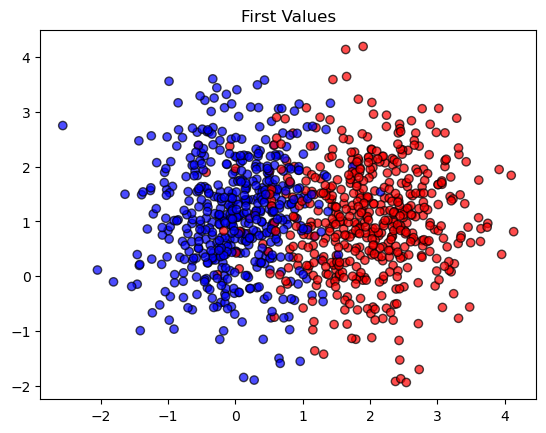

In [26]:
scatter_display(X, y, "", "", "First Values")

Question 2 - effectuez l'entrainement pour c = 1 et T = 1000. Utilisez le modèle SVC(kernel='linear',random_state=42) de la bibliothèque logicielle sklearn. affichez la frontière de décision et le taux d'exactitude. En s’inspirant de [la documentation de scikit-learn](https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html#sphx-glr-auto-examples-svm-plot-linearsvc-support-vectors-py), afficher la frontière de décision, les marges et vecteurs de supports par-dessus les données d’entrainement. N'utilisez pas de fonctions pour directement tracer cette courbe(faites le manuellement). (5 pts)

Taux d'exactitude: 0.9033333333333333


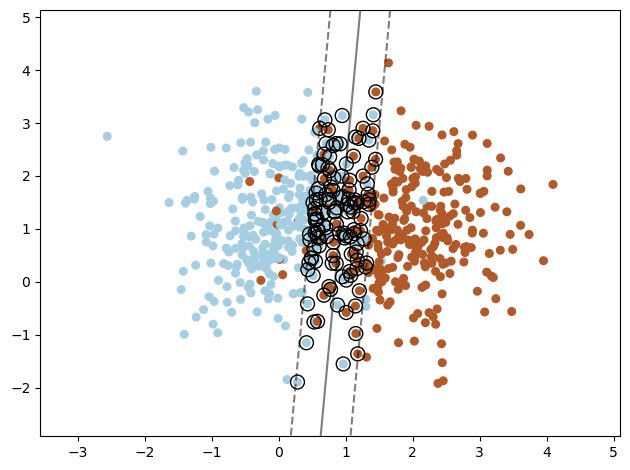

In [27]:
svm_model = SVC(C=1, kernel='linear', random_state=42, max_iter=1000)
svm_model.fit(X_train, y_train)
print(f"Taux d'exactitude: {svm_model.score(X_train, y_train)}")
decision_values = np.dot(X_train, svm_model.coef_[0]) + svm_model.intercept_[0]
support_vector_indices = np.where(np.abs(decision_values) <= 1 + 1e-15)[0]
support_vectors = X_train[support_vector_indices]



plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    svm_model,
    X_train,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)

plt.scatter(
    support_vectors[:, 0],
    support_vectors[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.tight_layout()
plt.show()
plt.show()

Question 3 - À l’aide des exemples de validation pour obtenir le taux d’exactitude, trouver les meilleurs hyper-paramètres en essayant les valeurs C  {0.005, 0.01, 0.1, 1, 10, 50, 100} et T  \{1, 10, 20, 50, 100, 200, 500,1000,2000,5000\} ( le nombre d'itération) .Éffectuez une recherche en grille de ces paramètres. Afficher un graphique de type «heat map» résumant les performances obtenues pour chaque combinaison de c et T . Expliquez l'impact de chaque hyper-paramètre. (5 pts)

/usr/lib/python3/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScale

{'mean_fit_time': array([0.00185709, 0.00160403, 0.00149493, 0.00228577, 0.00297599,
       0.00512242, 0.00397062, 0.0034287 , 0.00362625, 0.00381551,
       0.00121303, 0.0012435 , 0.00133333, 0.0018733 , 0.00259013,
       0.00320363, 0.00306568, 0.0029911 , 0.00320358, 0.00318241,
       0.00133858, 0.00114684, 0.00146995, 0.00219049, 0.00239682,
       0.00249691, 0.00267997, 0.00234799, 0.0023982 , 0.00223536,
       0.00118685, 0.00114794, 0.00130105, 0.0017601 , 0.0022892 ,
       0.00284948, 0.00285702, 0.0026402 , 0.0028986 , 0.00283866,
       0.00102344, 0.00120077, 0.00127273, 0.00141864, 0.00178556,
       0.00245361, 0.00332351, 0.00364132, 0.00413756, 0.00396557,
       0.0010417 , 0.00132055, 0.00124683, 0.00134039, 0.00163178,
       0.00202432, 0.00315495, 0.00420461, 0.00541687, 0.00603104,
       0.00093188, 0.00111308, 0.00127997, 0.00135336, 0.00145903,
       0.00193539, 0.00287981, 0.00473037, 0.0071619 , 0.0084199 ]), 'std_fit_time': array([2.49752874e-04, 8.4

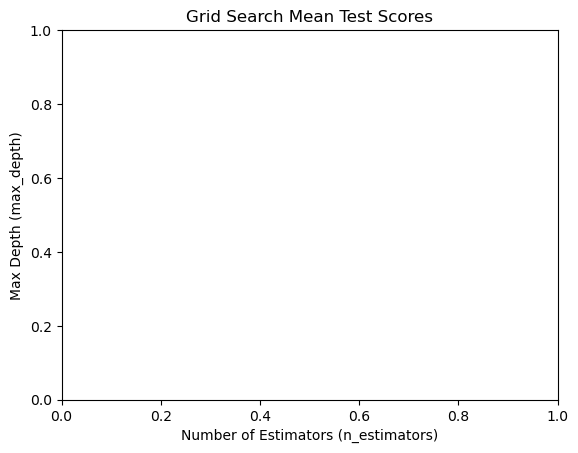

In [37]:
c = (0.005, 0.01, 0.1, 1, 10, 50, 100)
t = (1, 10, 20, 50, 100, 200, 500,1000,2000,5000)

param_grid = {
    'max_iter': [1, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000],  # Replace T with n_estimators
    'C': [0.005, 0.01, 0.1, 1, 10, 50, 100]  # Replace C with max_depth or any other applicable parameter
}

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

# Extract results
results = grid_search.cv_results_

print(results)

# Plotting the heatmap
plt.figure()

plt.title('Grid Search Mean Test Scores')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Max Depth (max_depth)')
plt.show()

## Exercise 2 : SVM à noyau(20 pts)

### Rappels de cours

Dans un SVM à noyau, les vecteurs ${\bf x}_n$ sont projetés dans un nouvel espace par la fonction $\phi$ pour obtenir ${\bf z}_n = \phi({\bf x}_n)$. Cependant, ce nouveau vecteur peut possiblement avoir une dimension infinie (ce qui est le cas pour un noyau Gaussien). On ne veut / peut donc pas calculer explicitement ces vecteurs. Pour maximiser la marge avec les contraintes comme précédemment, on ne peut donc plus résoudre le problème primal ; on doit passe donc au *dual*. On résout alors le problème suivant :
\begin{equation}
\begin{aligned}
\underset{\alpha}{\text{maximize}}&& \sum\limits_{n=1}^{N} \alpha_n &- \frac{1}{2}\sum\limits_{n=1}^{N}\sum\limits_{m=1}^{N}\alpha_n\alpha_m y_n y_m K({\bf x}_n, {\bf x}_m)\\
\text{subject to}&& 0 \leq \alpha_n &\leq C \quad n = 1, \dots, N\\
&& \sum\limits_{n=1}^N \alpha_n y_n &= 0
\end{aligned}
\end{equation}

Ici, $\alpha\in\mathbb{R}_+^N$ est un vecteur qui donne un "poids" à chaque donnée d’entrainement, $K$ est la fonction noyau et C est l’hyper-paramètre qui contrôle le compromis entre les deux objectifs de l’entrainement. Sous certaines conditions, on peut montrer que $K({\bf x}_n, {\bf x}_m) = {\bf z}_n^\top {\bf z}_m = \phi({\bf x}_n)^\top \phi({\bf x}_m)$. C’est-à-dire que $K$ permet d’exprimer la ressemblance entre deux vecteurs dans un espace transformé (possiblement à dimension infinie), sans jamais explicitement transformer les vecteurs d’entrées ${\bf x}_n$. 

Dans cet exercice, on va utiliser le noyau Gaussien, qui est le plus courant, définit par :
\begin{equation}
K({\bf x}_n, {\bf x}_m) = \exp(-\gamma ||{\bf x}_n - {\bf x}_m||^2)
\end{equation}
Ici, $\gamma$ correspond à l’inverse de deux fois la déviation standard au carré $\gamma = \frac{1}{2\sigma^2}$. Son choix est critique pour la performance ; une bonne approximation (utilisée par défaut dans scikit-learn) est : $$\gamma = \frac{1}{\text{entrées} \cdot \mathrm{Var}(X)}$$



Une fois le problème ci-dessus résolu, on obtient un vecteur $\alpha\in\mathbb{R}_+^N$. Chaque composante de ce vecteur est positive ou nulle et les données ${\bf x}_n$ pour lesquelles $\alpha_n > 0$ sont appelés des **vecteurs de support**. On peut alors effectuer une prediction pour un nouveau vecteur ${\bf x}$:
\begin{equation}
y_{\text{pred}} = \sum\limits_{n=1}^{N}\alpha_n y_n K({\bf x}, {\bf x}_n) + b
\end{equation}
Où $b$ est le biais. On peut remarquer que le biais n’apparait pas dans le problème résolu précédemment. Pour le trouver, on utilise l’équation suivante :
\begin{equation}
b = \frac{1}{|\mathcal{S}|}\sum\limits_{n\in\mathcal{S}}\left(y_n - \sum\limits_{m=1}^N \alpha_m y_m K({\bf x}_n, {\bf x}_m)\right)
\end{equation}
où $\mathcal{S} = \{n : \alpha_n \neq 0, n=1,\dots,N\}$ est l’ensemble des indices des vecteurs de support.

### Questions:

1. Effectuez les points 1 à 6 de l'exercise 1 mais avec les données suivantes:      (10 pts)
```python
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)   
```
commentez sur les différences pour chaques étapes.

2. Effectuez les points 1 à 6 de la l'excercise 1 mais avec les données suivantes et le modèle suivant:     (10 pts)
```python
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
SVC(kernel='rbf' ,random_state=42)
```
commentez sur les différences pour chaques étapes.

## Exercise 3 (20 pts)
Le CIFAR-10 est un ensemble de données très utilisé en apprentissage automatique et vision par ordinateur. Il contient 60 000 images couleur de 32x32 pixels réparties en 10 classes différentes, chacune représentant un objet comme des avions, des automobiles, des oiseaux, des chats, des chiens, etc. L'ensemble est divisé en 50 000 images pour l'entraînement et 10 000 images pour les tests. CIFAR-10 est couramment utilisé pour entraîner des modèles de classification d'images et évaluer leurs performances.
### Questions
un code vous est fourni dans lequel est testé le SVM linéaire et le SVM à noyaux. Les images, comportant 32x32 = 1024 dimensions prendraient trop de temps et de puissance de calcul pour en faire l'analyse. Une réduction de la dimensionnalité(PCA) a été éffectuée en vue d'accélérer l'entrainement.
1. Faites rouler le code. **prévoyez de 20 à 40 minutes pour l'éxécution du code!**

2. Éxaminez les tableaux thermiques pour le SVM linéaire et le SVM à noyaux. Que remarquez vous? Commentez et expliquez les différences. (10 pts)

3. Éxaminez les tableaux de temps d'entrainement( en seconde). Que remarquez vous? Commentez et expliquez les différences. (10 pts)

4. Modifiez le code pour utiliser un CNN-2D à la place d'un SVM. Commentez et expliquez les différences.(**BONUS**) (5 pts)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from keras.datasets import cifar10
import seaborn as sns
import time
from tqdm import tqdm  # Import tqdm for progress bar

# Load the CIFAR-10 dataset
(X_train_full, y_train_full), (X_test_full, y_test_full) = cifar10.load_data()

# Flatten images for SVM (SVM requires 2D arrays)
X_train_full = X_train_full.reshape(X_train_full.shape[0], -1)
X_test_full = X_test_full.reshape(X_test_full.shape[0], -1)

# Convert labels to 1D arrays
y_train_full = y_train_full.flatten()
y_test_full = y_test_full.flatten()

# Use PCA to reduce dimensionality (reduce to 50 components for faster training)
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_full)
X_test_pca = pca.transform(X_test_full)

# Split the data into training (60%), validation (20%), and test sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_train_pca, y_train_full, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the parameter ranges
C_values = [0.001, 0.01, 1, 10, 100, 1000]  # Regularization parameter
T_values = [500, 1000, 2000, 5000]  # Maximum iterations
kernels = ['linear', 'rbf']  # Try both linear and RBF kernels

# Initialize arrays to store validation and test results
validation_results = {kernel: np.zeros((len(C_values), len(T_values))) for kernel in kernels}
test_results = {kernel_type: 0 for kernel_type in kernels}  # For test set accuracy
fit_times = {kernel: np.zeros((len(C_values), len(T_values))) for kernel in kernels}  # Store fit times

# Train on the training set and evaluate on validation and test sets
for kernel_type in kernels:
    print(f"Entraînement avec le noyau {kernel_type}")
    
    # Use tqdm to create a progress bar
    for i, C_value in enumerate(tqdm(C_values, desc=f'Entraînement des valeurs de C (noyau={kernel_type})')):
        for j, T_value in enumerate(T_values):
            # Create and train the model
            model = SVC(kernel=kernel_type, C=C_value, max_iter=T_value, random_state=42)

            # Measure the training time
            start_time = time.time()
            model.fit(X_train_scaled, y_train)
            fit_time = time.time() - start_time
            fit_times[kernel_type][i, j] = fit_time

            # Predict and evaluate on validation set
            y_val_pred = model.predict(X_val_scaled)
            validation_results[kernel_type][i, j] = accuracy_score(y_val, y_val_pred)

# Find the best hyperparameters from the validation set
best_results = {}
for kernel_type in kernels:
    best_indices = np.unravel_index(np.argmax(validation_results[kernel_type], axis=None), validation_results[kernel_type].shape)
    best_C = C_values[best_indices[0]]
    best_T = T_values[best_indices[1]]
    
    # Now train the model on the full training set with the best hyperparameters and evaluate on the test set
    best_model = SVC(kernel=kernel_type, C=best_C, max_iter=best_T, random_state=42)
    best_model.fit(X_train_scaled, y_train)
    
    # Predict and evaluate on the test set
    y_test_pred = best_model.predict(X_test_scaled)
    test_results[kernel_type] = accuracy_score(y_test, y_test_pred)
    
    best_results[kernel_type] = (best_C, best_T, validation_results[kernel_type][best_indices])

# Plot the heatmap for validation set results for linear kernel
plt.figure(figsize=(10, 8))
sns.heatmap(validation_results['linear'], annot=True, fmt=".2f", xticklabels=T_values, yticklabels=C_values, cmap="magma")
plt.title("Précision sur l'ensemble de validation pour le noyau linéaire (CIFAR-10 avec PCA)")
plt.xlabel("T (max_iter)")
plt.ylabel("C (regularization)")
plt.show()

# Plot the heatmap for validation set results for RBF kernel
plt.figure(figsize=(10, 8))
sns.heatmap(validation_results['rbf'], annot=True, fmt=".2f", xticklabels=T_values, yticklabels=C_values, cmap="magma")
plt.title("Précision sur l'ensemble de validation pour le noyau RBF (CIFAR-10 avec PCA)")
plt.xlabel("T (max_iter)")
plt.ylabel("C (regularization)")
plt.show()

# Plot the heatmap for fitting times for linear kernel
plt.figure(figsize=(10, 8))
sns.heatmap(fit_times['linear'], annot=True, fmt=".2f", xticklabels=T_values, yticklabels=C_values, cmap="viridis")
plt.title("Temps d'ajustement pour le noyau linéaire (CIFAR-10 avec PCA)")
plt.xlabel("T (max_iter)")
plt.ylabel("C (regularization)")
plt.show()

# Plot the heatmap for fitting times for RBF kernel
plt.figure(figsize=(10, 8))
sns.heatmap(fit_times['rbf'], annot=True, fmt=".2f", xticklabels=T_values, yticklabels=C_values, cmap="viridis")
plt.title("Temps d'ajustement pour le noyau RBF (CIFAR-10 avec PCA)")
plt.xlabel("T (max_iter)")
plt.ylabel("C (regularization)")
plt.show()

# Print the best results for each kernel
print(f"Meilleure précision de validation pour le noyau linéaire : {best_results['linear'][2]:.4f} (C={best_results['linear'][0]}, T={best_results['linear'][1]})")
print(f"Précision sur l'ensemble de test avec le noyau linéaire : {test_results['linear']:.4f}")
print(f"Meilleure précision de validation pour le noyau RBF : {best_results['rbf'][2]:.4f} (C={best_results['rbf'][0]}, T={best_results['rbf'][1]})")
print(f"Précision sur l'ensemble de test avec le noyau RBF : {test_results['rbf']:.4f}")

ModuleNotFoundError: No module named 'keras'

## Exercise 4 : SVMs sur MNIST (30 pts)

**Pour cette partie, vous n'avez aucune restriction pour l'utilisation de bibliothèque.**

Le jeu de données MNIST est l'un des ensembles de données les plus connus et largement utilisés dans le domaine de l'apprentissage automatique. Il contient 70 000 images de chiffres écrits à la main, de 0 à 9, avec chaque image de taille 28x28 pixels en niveaux de gris. Les 60 000 premières images sont utilisées pour l'entraînement, tandis que les 10 000 restantes servent à l'évaluation. Le but est de classifier chaque image en identifiant le chiffre qu'elle représente. MNIST est souvent utilisé comme benchmark pour tester des algorithmes de classification, car il s'agit d'un problème de reconnaissance d'images relativement simple mais qui permet d'explorer des concepts avancés tels que la réduction de dimensionnalité, la régularisation, et la recherche d'hyperparamètres.

1. Téléchargez le jeu de données MNIST et divisez-le en ensembles d'entraînement, de validation, et de test (5 pts):
python
from keras.datasets import mnist

2. Imprimez une image de chaque classe. Applatissez ensuites toutes les images. Imprimez un vecteur unidimensionnel correspondants au images précédentes.(5 pts).

3.  Diviser les données en ensembles d'entraînement, de validation et de test de la facon suivante(5 pts) :
- 60% données entrainement
- 20% données de validation
- 20% données de test

4. Effectuez une recherche en grille avec les données d'entrainement et de validation pour trouver les meilleurs hyperparamètres C et T selon «5 fold» entre les classes du chiffre 8 et du chiffre 3. Utilisez C_values = [0.001, 0.01, 1, 10, 100, 1000] et T_values = [500, 1000, 2000, 5000]. Pour chaque combinaison, affichez la précision sur l'ensemble de validation à l'aide d'un graphique de type "heatmap". Expliquez les impacts de chaque hyperparamètre sur la précision. Effectuez ceci pour le noyaux linéaire et le noyaux RBF. Commentez les résultats. (10 pts)

5. Répétez le numéro 4 avec les chiffre 8 et 0. Que remarquez vous? Donnez une hypothèse pour expliquer la différence.

6. en utilisant la meilleure combinaison de C et T trouvé au numéro 4, entrainez les SVM au noyau linéaire et au noyau RBF sur les 10 classes. Commentez les résultats. Que remarquez vous? (5pts)

5. Ajoutez une étape de réduction de dimensionnalité en utilisant PCA pour réduire les données à 50 dimensions. Comparez les résultats (précision et temps d'entraînement)  avec ceux obtenus sans réduction de dimension  numéro 4 . Commentez sur l'impact de la réduction de dimensionnalité sur le modèle.(**bonus**)(5 pts)

## Exercise 5 : kNN (20 pts)

Pour cet exercice, nous allons implémenter un classificateur des k plus proches voisins (*k-Nearest Neighbors* ou *k-NN*).

### Rappels de cours

Le classificateur des k plus proches voisins est un algorithme qui classifie les objets selon leur proximité aux données d’entraînement. C’est une approche de modélisation simple qui approxime la frontière de décision localement. Il n’y a pas d’entraînement à proprement parler et les calculs sont seulement effectués lors de la classification. Comme la figure ci-dessous le montre, la classification d’un exemple est effectuée en choisissant la classe la plus fréquente parmi les plus proches voisins. Bien que plusieurs mesures de distance puissent être utilisées pour définir le voisinage, la mesure la plus utilisée est la distance Euclidienne, définie par :
\begin{equation*}
d(p,q) = \sqrt{\sum_{i=1}^{d}(p_i - q_i)^2}
\end{equation*}

où $p$ et $q$ sont deux points dans un espace ${\mathbb R}^d$.

<img src=images/kNN.png style="width: 300px;">

Dans cette figure, si on ne considère que 3 voisins on attribuera la classe A alors que si on considère 7 voisins, on attribuera plutôt la classe B.

Normalement, un kNN ne génère pas de probabilités, car il renvoie simplement la classe majoritaire. Dans cet exercice, on va modifier la fonction de classification pour introduire la notion de probabilité.
\begin{equation*}
P(C_j | {\bf x}) = \dfrac{n_j}{k}
\end{equation*}
où $n$ est le nombre de plus proches voisins appartenant à la classe $C_j$ et $k$ le nombre total de plus proches voisins considérés.

Le classificateur kNN est une méthode non paramétrique qui ne nécessite pas d’établir une hypothèse au préalable sur la nature des distributions de données (contrairement à un Perceptron par exemple). Le seul paramètre à déterminer est la taille du voisinage $k$. On choisit ce paramètre à partir des données.

### Questions

1. Charger les données du datatset Iris à l’aide de la fonction `sklearn.datasets.load_iris`. (5 pts)
2. Séparer aléatoirement les données en deux parties (entrainement et test) de manière balancée avec la fonction `sklearn.model_selection.train_test_split`. (5 pts)
3. Implémenter un kNN permettant d’utiliser n’importe quel $k$ en paramètre en utilisant la classe fournie ci-dessous(5 pts) :
    * La méthode `fit` sert à charger les données et déterminer les classes du problème.
    * La méthode `predict_proba` prend en entrée des données `X` et renvoie les probabilités prédites pour chaque classe du problème.
    * La méthode `predict` prend en entrée des données `X` et renvoie la classe prédite pour chaque échantillon.
4. Calculer et tracer le taux d'exactitude pour 1-NN, 2-NN jusqu’à 10-NN. Commenter ces résultats. Quels sont les limitations de cette méthode d’évaluation ? (5 pts)

In [ ]:
import numpy as np

class kNN(object):
    def __init__(self, k: int) -> None:
        """
        Classificateur kNN.

        Parameters
        ----------
        k : int
            Nombre de plus proches voisins utilisés pour classifier un nouveau point.

        """
        pass

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Chargement des données.

        Parameters
        ----------
        X : np.ndarray
            Données d'entrainement. Taille : (# exemples, # entrées).
        y : np.ndarray
            Étiquettes des données d'entrainement. Taille : (# exemples,).

        """
        pass

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """
        Fonction de classification du kNN pour un ou plusieurs points.

        Parameters
        ----------
        X : np.ndarray
            Donnée(s) d'entrée à classifier. Taille : (# exemples, # entrées).

        Returns
        -------
        probabilities : np.ndarray
            Vecteur(s) de probabilités prédits pour chaque données d'entrée. Taille : (# exemples, # classes).

        """
        pass

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Fonction de classification du kNN pour un ou plusieurs points

        Parameters
        ----------
        X : np.ndarray
            Donnée(s) d'entrée à classifier. Taille : (# exemples, # entrées).

        Returns
        -------
        y_pred : np.ndarray
            Étiquette(s) prédite(s) pour chaque donnée d'entrée.. Taille : (# exemples,).

        """
        pass

## Exercice 6 (20 pts) : Classificateur Bayésien naïf

Le but de cet exercice est d’implémenter un classificateur Bayésien naïf dans lequel on fait les suppositions suivantes :

- Les caractéristiques du problème sont indépendantes ;
- Les caractéristiques suivent des distributions gaussiennes :

  $$
  P(x | \mu_k, \sigma_k) = \frac{1}{\sigma_k \sqrt{2\pi}} \exp\left( -\frac{(x - \mu_k)^2}{2\sigma_k^2} \right)
  $$

  où $\mu_k$ et $\sigma_k$ sont la moyenne et l'écart-type d'une composante pour la classe $k$.


### Questions

Dans cet exercice, on réutilise les données de l’exercice précédent (dataset Iris) avec la même séparation.

1. Implémenter un classificateur Bayésien naïf dans une classe `NaiveBayes`. Cette classe contient les mêmes méthodes que la classe `kNN` donnée ci-dessus. Ici la méthode `fit` permet de déterminer les classes du problème, calculer les probabilités a priori et calculer les caractéristiques de chaque classe (pour pouvoir calculer les probabilités conditionnelles dans `predict_proba`). (10 pts)
2. Calculer le taux d’exactitude pour ce classificateur et le comparer au meilleur des kNN obtenu précédemment.  Commenter ce taux et conclure quant aux différences de modélisations entre ces deux modèles. Quels sont les avantages du classificateur Bayésien naïf par rapport au kNN ? (10 pts)